Fetching data...


/tmp/ipython-input-259839325.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2020-01-01', end='2024-01-01')['Close']
[*********************100%***********************]  5 of 5 completed



--- RISK METRICS (95% Confidence) ---
Value at Risk (VaR):       $-166.96
Expected Shortfall (ES):   $-247.60
Interpretation: On a bad day (worst 5%), we expect to lose $247.60 on average.


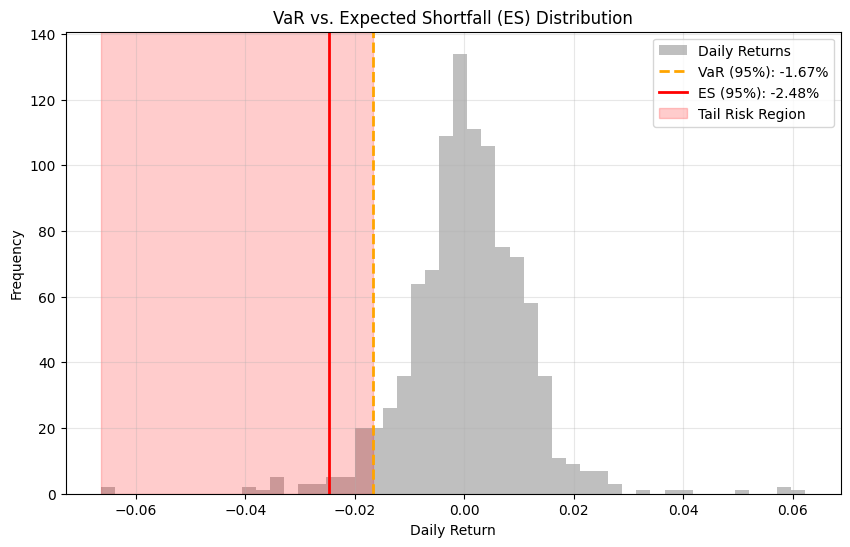

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- STEP 1: FETCH DATA ---
tickers = ['AAPL', 'MSFT', 'TLT', 'GLD', 'SPY']
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
initial_investment = 10000

print("Fetching data...")
data = yf.download(tickers, start='2020-01-01', end='2024-01-01')['Close']
returns = data.pct_change().dropna()

# --- STEP 2: CALCULATE PORTFOLIO RETURNS ---
portfolio_returns = returns.dot(weights)

# --- STEP 3: CALCULATE VaR & ES (Historical Method) ---
confidence_level = 0.95
alpha = 1 - confidence_level # 0.05

# 1. Calculate VaR (The Threshold)
var_percentile = np.percentile(portfolio_returns, alpha * 100)
var_value = initial_investment * var_percentile

# 2. Calculate Expected Shortfall (The Average of the Tail)
# Filter for all returns that are WORSE (less) than the VaR threshold
tail_losses = portfolio_returns[portfolio_returns < var_percentile]
es_percentile = tail_losses.mean()
es_value = initial_investment * es_percentile

print("\n--- RISK METRICS (95% Confidence) ---")
print(f"Value at Risk (VaR):       ${var_value:.2f}")
print(f"Expected Shortfall (ES):   ${es_value:.2f}")
print(f"Interpretation: On a bad day (worst 5%), we expect to lose ${abs(es_value):.2f} on average.")

# --- STEP 4: VISUALIZATION ---
plt.figure(figsize=(10, 6))

# Plot Histogram of Returns
plt.hist(portfolio_returns, bins=50, alpha=0.5, color='grey', label='Daily Returns')

# Add Lines for VaR and ES
plt.axvline(var_percentile, color='orange', linestyle='--', linewidth=2, label=f'VaR (95%): {var_percentile:.2%}')
plt.axvline(es_percentile, color='red', linestyle='-', linewidth=2, label=f'ES (95%): {es_percentile:.2%}')

# Highlight the "Tail" (The area ES averages)
plt.axvspan(min(portfolio_returns), var_percentile, alpha=0.2, color='red', label='Tail Risk Region')

plt.title('VaR vs. Expected Shortfall (ES) Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

# Save for GitHub
plt.savefig('day10_es.png')
plt.show()